<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/05-perceptron-algorithm/01_perceptron_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Perceptron algorithm

Let's develop the perceptron algorithm for our sentiment analysis application.

First we’ll write the code from scratch to fit our original dataset,
and then we’ll use Turi Create. 

In real life, we always use a package and have little need to code our
own algorithms.

##Setup

In [ ]:
!pip -q install turicreate

In [22]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import turicreate as tc

random.seed(0)

In [3]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, **kwargs)

##Defining dataset

Let’s begin by defining our dataset as a NumPy array. The features correspond to two numbers
corresponding to the appearances of aack and beep. 

The labels are 1 for the happy sentences and
0 for the sad ones.

In [4]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

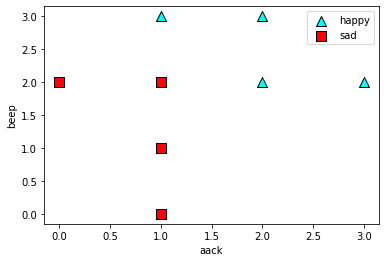

In [5]:
# Plotting the points
plot_points(features, labels)

##Perceptron trick

We start by coding the score function and the prediction.

The score function
returns the score that the model gives to that data point, and the prediction function returns a 1
if the score is greater than or equal to zero and a 0 if the score is less than zero.

In [11]:
def score(weights, bias, features):
  return features.dot(weights) + bias

To write the prediction function, we first write the step function. The prediction is the step function
of the score.

In [12]:
def step(x):
  if x >= 0:
    return 1
  else:
    return 0

def prediction(weights, bias, features):
  return step(score(weights, bias, features))

Recall that the error is zero if the point is correctly
classified and the absolute value of the score if the point is misclassified.

In [10]:
def error(weights, bias, features, label):
  pred = prediction(weights, bias, features)
  # If the prediction is equal to the label, then the point is well classified, which means the error is zero
  if pred == label:
    return 0
  else:
    # If the prediction is different from the label, then the point is misclassified, which means the error is equal to the absolute value of the score.
    return np.abs(score(weights, bias, features))

We now write a function for the mean perceptron error. This function calculates the average of
the errors of all the points in our dataset.

In [13]:
def mean_perceptron_error(weights, bias, features, labels):
  total_error = 0
  for i in range(len(features)):
    total_error += error(weights, bias, features[i], labels[i])
  return total_error / len(features)

Now, let's test its prediction.

In [16]:
weights = [1, 1]
bias = -3.5

for i in range(len(features)):
  print(prediction(weights, bias, features[1]), error(weights, bias, features[i], labels[i]))

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [17]:
weights = [1, 2]
bias = -4

for i in range(len(features)):
  print(prediction(weights, bias, features[1]), error(weights, bias, features[i], labels[i]))

1 0
1 0
1 0
1 1
1 0
1 0
1 0
1 0


Now that we have the error function, we can go ahead and code the perceptron trick.

In [18]:
def perceptron_trick(weights, bias, features, label, learning_rate =0.01):
  pred = prediction(weights, bias, features)
  if pred == label:
    return weights, bias
  else:
    if label == 1 and pred == 0:
      for i in range(len(weights)):
        weights[i] += features[i] * learning_rate
      bias += learning_rate
    elif label == 0 and pred == 1:
      for i in range(len(weights)):
        weights[i] -= features[i] * learning_rate
      bias -= learning_rate
  return weights, bias

In [19]:
perceptron_trick(weights, bias, features[6], 0)

([0.98, 1.97], -4.01)

In [20]:
# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate=0.01):
  pred = prediction(weights, bias, features)
  for i in range(len(weights)):
    weights[i] += (label - pred) * features[i] * learning_rate
    bias += (label - pred) * learning_rate
  return weights, bias

In [21]:
perceptron_trick(weights, bias, features[6], 0)

([0.96, 1.94], -4.02)

##Running the perceptron algorithm

Now that we have the perceptron trick, we can code the perceptron algorithm. Recall that the
perceptron algorithm consists of starting with a random perceptron classifier and repeating the
perceptron trick many times (as many as the number of epochs).

In [23]:
random.seed(0)

def perceptron_algorithm(features, labels, learning_rate=0.01, epochs=200):
  weights = [1.0 for i in range(len(features[0]))]
  bias = 0.0
  errors = []

  for epoch in range(epochs):
    draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
    error = mean_perceptron_error(weights, bias, features, labels)
    errors.append(error)
    i = random.randint(0, len(features) - 1)
    weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
  draw_line(weights[0], weights[1], bias)
  plot_points(features, labels)
  plt.show()
  plt.scatter(range(epochs), errors)
  return weights, bias

Now let’s run the algorithm on our dataset!

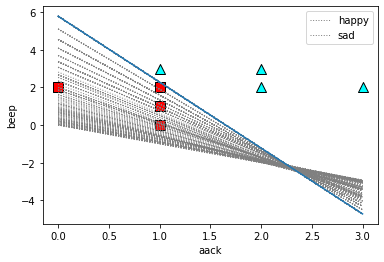

([0.6299999999999997, 0.17999999999999938], -1.0400000000000007)

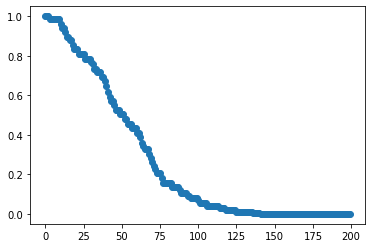

In [24]:
perceptron_algorithm(features, labels)

Notice how at each epoch, the line becomes a better fit for the points. The error
decreases (mostly) as we increase the number of epochs, until it reaches zero at around epoch
140, meaning that every point is correctly classified.

##The perceptron algorithm using Turi Create

Let's create an SFrame with our data from a dictionary.

In [7]:
data_dict = {
    "aack": features[:, 0],
    "beep": features[:, 1],
    "prediction": labels
}

data = tc.SFrame(data_dict)
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


Next, we create and train our perceptron classifier, using the `logistic_classifier` object and
the create method.

In [6]:
perceptron = 

NameError: ignored

In [ ]:
data = tc.SFrame({"x": X, "y": Y})
data.print_rows(5, 2)

The way to do polynomial regression in Turi Create is to add many columns to our dataset, corresponding
to the powers of the main feature, and to apply linear regression to this expanded
dataset. 

If the main feature is, say, $x$, then we add columns with the values of $x^2, x^3, x^4$, and so on.
Thus, our model is finding linear combinations of the powers of $x$, which are precisely polynomials
in $x$.

So, let's add columns to our dataset corresponding to $X^2, X^3,...,x^{200}$.

In [ ]:
for i in range(2, 200):
  strings = "x^" + str(i)
  data[strings] = data["x"].apply(lambda x: x ** i)

In [ ]:
data.print_rows(5, 5)

Before we train any models, we need to split the data into training and testing datasets.

In [ ]:
train, test = data.random_split(.8)

##Regularization

The way to use regularization in Turi Create is simple: all we need to do is specify the parameters
`l1_penalty` and `l2_penalty` in the create method when we train the model. This penalty
is precisely the regularization parameter.

A penalty of 0 means we are not using regularization.
Thus, we will train three different models.

In [ ]:
model_no_reg = tc.linear_regression.create(train, target="y", l1_penalty=0.0, l2_penalty=0.0, verbose=False, validation_set=None)

In [ ]:
display_results(model_no_reg)

Notice that the model with no regularization fits the training points really well, but it’s chaotic
and doesn’t fit the testing points well.

In [ ]:
model_l1_reg  = tc.linear_regression.create(train, target="y", l1_penalty=0.1, l2_penalty=0.0, verbose=False, validation_set=None)
display_results(model_l1_reg)

The model with L1 regularization does OK with both the
training and the testing sets.

In [ ]:
model_l2_reg  = tc.linear_regression.create(train, target="y", l1_penalty=0.0, l2_penalty=0.1, verbose=False, validation_set=None)
display_results(model_l2_reg)

But the model with L2 regularization does a wonderful job with
both the training and the testing sets and also seems to be the one that really captures the shape
of the data.


Also note that for the three models, the boundary curve goes a bit crazy on the end points.
This is completely understandable, because the endpoints have less data, and it is natural for the
model to not know what to do when there’s no data.

Let's test the model.



In [ ]:
predictions = test["x", "y"]

predictions["No reg"] = model_no_reg.predict(test)
predictions["L1 reg"] = model_l1_reg.predict(test)
predictions["L2 reg"] = model_l2_reg.predict(test)

predictions

The model with no regularization had a really large RMSE! Among the other two models, the
one with L2 regularization performed much better. 

Here are two questions to think about:

* Why did the model with L2 regularization perform better than the one with L1
regularization?
* Why does the model with L1 regularization look flat, whereas the model with L2 regularization managed to capture the shape of the data?

The two questions have a similar answer, and to find it, we can look at the coefficients of the
polynomials.

In [ ]:
model_no_reg.coefficients

In [ ]:
model_l1_reg.coefficients

In [ ]:
model_l2_reg.coefficients

From these polynomials, we see the following:

* For the model with no regularization, all the coefficients are large. This means the polynomial is chaotic and not good for making predictions.
* For the model with `L1` regularization, all the coefficients, except for the constant one (the first one), are tiny—almost 0. This means that for the values close to zero, the polynomial looks a lot like the horizontal line with equation `yˆ = 0.57`. This is better than the previous model but still not great for making predictions.
* For the model with `L2` regularization, the coefficients get smaller as the degree grows but are still not so small. This gives us a decent polynomial for making predictions.